In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Q: Is the average rating of our new drink better or worse than the average rating of our old drink?

# What sample size is needed to "precisely" answer this question?

# The average rating of our old drink is 2 stars (on a 1-3 scale)

***

# Without any additional info, let's just pick some reasonable "true" distribution for ratings on our new drink:

## 1 Star - 15%
## 2 Star - 65%
## 3 Star - 20%

# So that the average rating is 1 $\times$ 0.15 + 2 $\times$ 0.65 + 3 $\times$ 0.2 = 2.05

# Now ... how many samples from this distribution would it take to "precisely" say that the new drink is better?

***

In [3]:
RATING_DISTR = np.array([0.15, 0.65, 0.2])

In [19]:
def generate_ratings(rating_distr, n):
    return np.random.choice([1, 2, 3], n, p=rating_distr)


# or
# def generate_ratings(rating_distr, n):
#     # generates n ratings from the given ratings distribution
#     randvals = np.random.random(n).reshape(-1, 1)
#     ratings = np.argmax(randvals < rating_distr.cumsum(), axis=1) + 1
#     return ratings

In [20]:
generate_ratings(RATING_DISTR, 10)

array([2, 1, 1, 1, 2, 2, 2, 2, 2, 3])

In [22]:
ratings = generate_ratings(RATING_DISTR, 100000)
for i in [1, 2, 3]:
    print("%s Star: %s" % (i, np.mean(ratings == i)))
print("Average Rating: %s" % ratings.mean())

1 Star: 0.14718
2 Star: 0.65219
3 Star: 0.20063
Average Rating: 2.05345


In [23]:
1 * 0.14718 + 2 * 0.65219 + 3 * 0.20063

2.05345

## Suppose our sample size is just 10

In [25]:
def simulate_runs(rating_distr, n):
    # simulate many runs with that sample size
    avg_ratings = []

    for _ in range(10000):
        curr_ratings = generate_ratings(rating_distr, n)
        avg_ratings.append(curr_ratings.mean())

    return np.array(avg_ratings)

In [28]:
def plot_distribution(n, avg_ratings, plot=True):
    avg, sd = round(avg_ratings.mean(), 3), round(avg_ratings.std(), 3)
    if avg > 2:
        pct = np.mean(avg_ratings > 2)
    else:
        pct = np.mean(avg_ratings < 2)
    if plot:
        plt.figure(figsize=(10, 4))
        sns.histplot(avg_ratings)
        plt.title(
            "n=%s\nAvg: %s | SD: %s\nPct Distr: %s" % (n, avg, sd, pct), fontsize=20
        )
        plt.axvline(2, color="r")
        plt.xlabel("Avg Rating", fontsize=16)
        plt.ylabel("Density", fontsize=16)

    return pct

0.4976

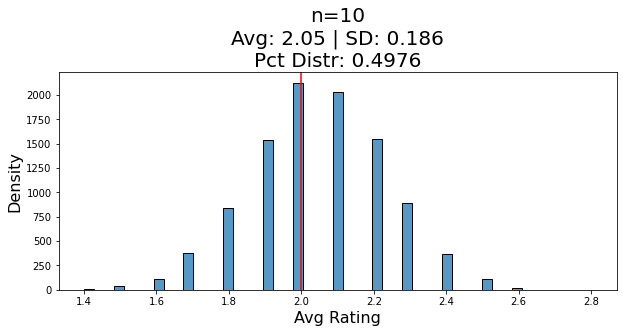

In [29]:
n = 10
avg_ratings = simulate_runs(RATING_DISTR, n)
plot_distribution(n, avg_ratings)

## What if our sample size is 100?

0.7789

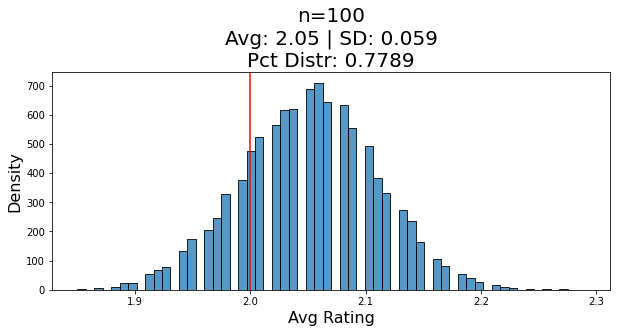

In [30]:
n = 100
avg_ratings = simulate_runs(RATING_DISTR, n)
plot_distribution(n, avg_ratings)

## What if its 1000?

0.9952

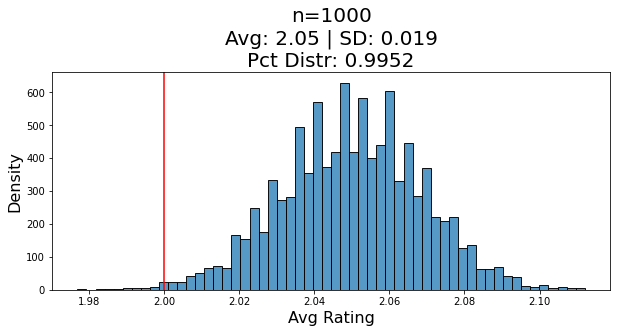

In [31]:
n = 1000
avg_ratings = simulate_runs(RATING_DISTR, n)
plot_distribution(n, avg_ratings)

# But ... all this analysis is dependent on the "true" ratings distribubion above. What if instead it was:

## 1 Star - 5%
## 2 Star - 50%
## 3 Star - 45%

# So that the average rating is 1 $\times$ 0.05 + 2 $\times$ 0.5 + 3 $\times$ 0.45 = 2.4

# Now ... how many samples from this distribution would it take to "precisely" say that the new drink is better?

***

In [32]:
RATING_DISTR = np.array([0.05, 0.5, 0.45])

0.9697

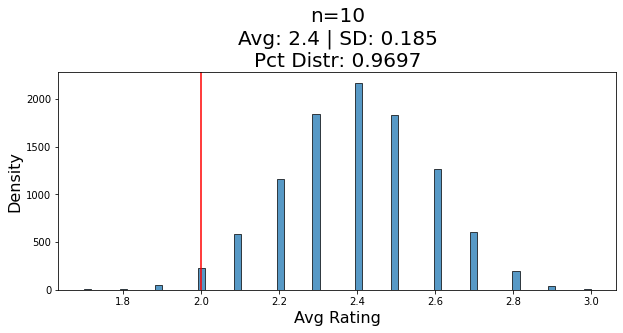

In [33]:
n = 10
avg_ratings = simulate_runs(RATING_DISTR, n)
plot_distribution(n, avg_ratings)

# Now, we can try out a bunch of different "true" distributions and see how the required sample size changes with each one!

In [34]:
# get many possible rating distributions
rating_distributions = []
p1_vals = np.arange(0, 1.1, 0.1)
for p1 in p1_vals:
    for p2 in np.arange(0, 1 - p1, 0.1):
        rating_distributions.append(np.array([p1, p2, 1 - p1 - p2]))

In [35]:
# this list will store the required sample size for each rating distribution
required_sample_sizes = []
for rating_distribution in rating_distributions:
    req_samp_size = -1
    for n in [5, 10, 25, 50, 100, 250, 500, 1000]:
        avg_ratings = simulate_runs(rating_distribution, n)
        pct = plot_distribution(n, avg_ratings, plot=False)
        if pct > 0.95:
            req_samp_size = n
            break
    required_sample_sizes.append(req_samp_size)

In [36]:
p1_vals = np.array([item[0] for item in rating_distributions])
p2_vals = np.array([item[1] for item in rating_distributions])

/home/masoud/anaconda3/envs/coding_env/lib/python3.7/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


(-0.05, 1.0)

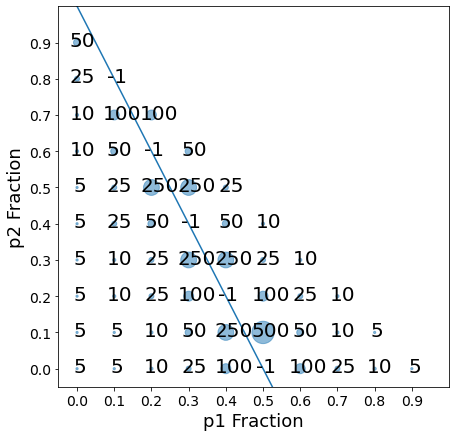

In [37]:
plt.figure(figsize=(7, 7))
plt.scatter(p1_vals, p2_vals, s=required_sample_sizes, alpha=0.5)
plt.xticks(np.arange(0, 1, 0.1), fontsize=14)
plt.yticks(np.arange(0, 1, 0.1), fontsize=14)
plt.xlabel("p1 Fraction", fontsize=18)
plt.ylabel("p2 Fraction", fontsize=18)
for i, r in enumerate(required_sample_sizes):
    plt.annotate(
        r,
        (p1_vals[i] - 0.01 * len(str(r)), p2_vals[i] - 0.01),
        fontsize=20,
        fontweight=2,
    )
plt.plot(p1_vals, -2 * p1_vals + 1)
plt.xlim(-0.05, 1)
plt.ylim(-0.05, 1)

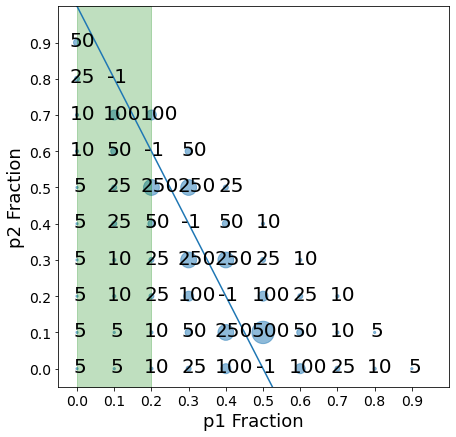

In [38]:
plt.figure(figsize=(7, 7))
plt.scatter(p1_vals, p2_vals, s=required_sample_sizes, alpha=0.5)
plt.xticks(np.arange(0, 1, 0.1), fontsize=14)
plt.yticks(np.arange(0, 1, 0.1), fontsize=14)
plt.xlabel("p1 Fraction", fontsize=18)
plt.ylabel("p2 Fraction", fontsize=18)
for i, r in enumerate(required_sample_sizes):
    plt.annotate(
        r,
        (p1_vals[i] - 0.01 * len(str(r)), p2_vals[i] - 0.01),
        fontsize=20,
        fontweight=2,
    )
plt.plot(p1_vals, -2 * p1_vals + 1)
plt.xlim(-0.05, 1)
plt.ylim(-0.05, 1)
plt.fill_betweenx([-0.1, 1], 0, 0.2, color="green", alpha=0.25)